In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False 

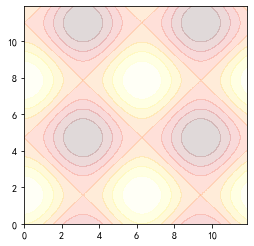

In [2]:
idx = np.arange(-0, 12, 0.1)
idy = np.arange(-0, 12, 0.1)
idxx, idyy = np.meshgrid(idx, idy)
x = np.c_[idxx.ravel(), idyy.ravel()]

def active(x):
    return np.cos(x[0]) + np.sin(x[1])
z = active(x.T)

idzz = z.reshape(idxx.shape)
data = np.concatenate([x, z.reshape(-1, 1)], axis=1)
plt.figure(figsize=(4, 4))
plt.contourf(idxx, idyy, idzz, alpha=0.15, cmap=plt.cm.hot)
plt.show()

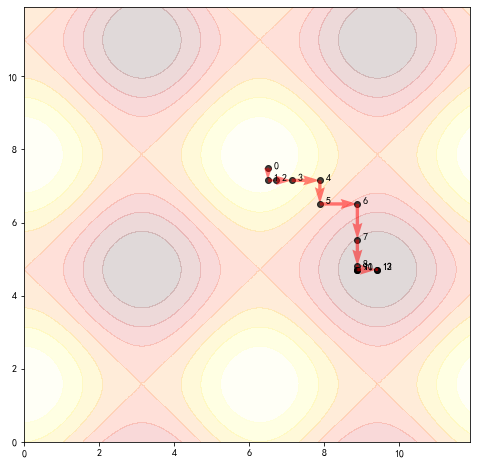

In [8]:
# 随机梯度下降
pnt_s = [6.5, 7.5]
pnt_ss = [pnt_s, ]

pnt_z = active(pnt_s)
pnt_zs = [pnt_z, ]

np.random.seed(1139039)
steps = 15
for i in range(steps):
    if np.random.rand() >= 0.5:
        grd_x = -np.sin(pnt_s[0])
        grd_s = [grd_x, 0]
    else:
        grd_y = np.cos(pnt_s[1])
        grd_s = [0, grd_y]
    pnt_s2 = [pnt_s[0]-grd_s[0], pnt_s[1]-grd_s[1]]
    pnt_ss.append(pnt_s2)
    pnt_z = active(pnt_s2)
    pnt_zs.append(pnt_z)
    pnt_s = pnt_s2

idzz = z.reshape(idxx.shape)
data = np.concatenate([x, z.reshape(-1, 1)], axis=1)

plt.figure(figsize=(8, 8))
plt.contourf(idxx, idyy, idzz, alpha=0.15, cmap=plt.cm.hot)
for i in range(steps-1):
    pnt1, pnt2 = pnt_ss[i], pnt_ss[i+1]
    dx, dy = pnt2[0]-pnt1[0], pnt2[1]-pnt1[1]
    plt.scatter(pnt1[0], pnt1[1], alpha=0.75, color="black")
    plt.quiver(pnt1[0], pnt1[1], dx, dy, angles='xy', scale=1, scale_units='xy', color="red", alpha=0.5)
    plt.annotate(i, xy=(pnt1[0], pnt1[1]), xytext=(pnt1[0]+0.15, pnt1[1]))
plt.show()